# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:


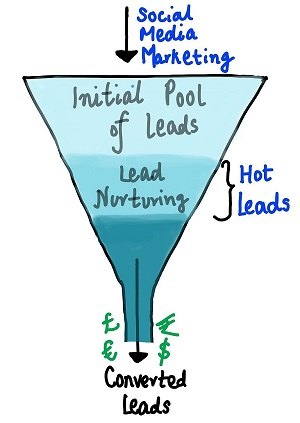
 
Lead Conversion Process - Demonstrated as a funnel
Lead Conversion Process - Demonstrated as a funnel
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals of the Case Study

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [436]:
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Loading and Cleaning Data

In [437]:
leadScore_df=pd.read_csv("Leads.csv")

In [438]:
leadScore_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [439]:
# Converting all the values to lower case
leadScore_df = leadScore_df.applymap(lambda s:s.lower() if type(s) == str else s)

In [440]:
# Handling select
leadScore_df=leadScore_df.replace('select',np.nan)

In [441]:
# total number of rows before data cleaning
intial_num_rows=leadScore_df.shape[0]
leadScore_df.shape

(9240, 37)

In [442]:
intial_num_rows

9240

In [443]:
# Checking the datatypes of all the features
leadScore_df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [444]:
# checking the of numerical features
leadScore_df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [445]:
# Checking if there are columns with one unique value since it won't affect our analysis
leadScore_df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

As there are few features with only one category dropping those feature

In [446]:
# Magazine,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque
# Dropping unique valued columns
leadScore_df= leadScore_df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [447]:
leadScore_df.shape

(9240, 32)

In [448]:
# Extracting categorical columns from leadScore_data1 dataframe
cat=leadScore_df.select_dtypes(include="object")
print(cat.columns)
print(len(cat.columns))

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')
25


Deleting all the features those are created by the sales team as they are not much useful in the model creation

In [449]:
# 'Last Activity','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score',Tags','Last Notable Activity'

leadScore_df= leadScore_df.drop(['Last Activity','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Tags','Last Notable Activity'],axis=1)

In [450]:
leadScore_df.shape

(9240, 23)

In [451]:
leadScore_df['Prospect ID'].value_counts().sum()

9240

In [452]:
leadScore_df['Lead Number'].value_counts().sum()

9240

Deleting Lead Number as the Prospect ID is also unique ID given 

In [453]:
leadScore_df= leadScore_df.drop(['Lead Number'],axis=1)

In [454]:
leadScore_df.shape

(9240, 22)

In [455]:
# Checking the percentage of each category
100*(leadScore_df.isnull().sum()/leadScore_df.shape[0])

Prospect ID                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [456]:
# Dropping columns having missing values greater than 40%

leadScore_df=leadScore_df.drop('How did you hear about X Education',axis=1)

In [457]:
leadScore_df.shape

(9240, 21)

In [458]:
# Checking the percentage of each category
100*(leadScore_df['Lead Origin'].value_counts(normalize=True))

landing page submission    52.878788
api                        38.744589
lead add form               7.770563
lead import                 0.595238
quick add form              0.010823
Name: Lead Origin, dtype: float64

As 'lead add form','lead import','quick add form' have very few values we can replace them as others

In [459]:
leadScore_df['Lead Origin']=leadScore_df['Lead Origin'].apply(lambda x:'others' if (x=='lead add form' or x=='lead import' or x=='quick add form') else x)

In [460]:
# Checking the percentage of each category
100*(leadScore_df['Lead Origin'].value_counts()/len(leadScore_df.index))

landing page submission    52.878788
api                        38.744589
others                      8.376623
Name: Lead Origin, dtype: float64

In [461]:
# Checking the percentage of each category
100*(leadScore_df['Lead Source'].value_counts()/len(leadScore_df.index))

google               31.093074
direct traffic       27.521645
olark chat           18.993506
organic search       12.489177
reference             5.779221
welingak website      1.536797
referral sites        1.352814
facebook              0.595238
bing                  0.064935
click2call            0.043290
social media          0.021645
live chat             0.021645
press_release         0.021645
pay per click ads     0.010823
blog                  0.010823
welearn               0.010823
welearnblog_home      0.010823
youtubechannel        0.010823
testone               0.010823
nc_edm                0.010823
Name: Lead Source, dtype: float64

Grouping the given categories to 'others'

"reference,welingak website,referral sites,facebook,bing,click2call,social media,live chat,press_release,pay per click ads,blog,welearn,welearnblog_home,youtubechannel,testone,nc_edm"

In [462]:
leadScore_df['Lead Source']=leadScore_df['Lead Source'].apply(lambda x:'others' if (x=='reference' or x=='welingak website' or x=='referral sites') else x)

In [463]:
leadScore_df['Lead Source']=leadScore_df['Lead Source'].apply(lambda x:'others' if (x=='facebook' or x=='bing' or x=='click2call') else x)


In [464]:
leadScore_df['Lead Source']=leadScore_df['Lead Source'].apply(lambda x:'others' if (x=='social media' or x=='live chat' or x=='press_release') else x)




In [465]:
leadScore_df['Lead Source']=leadScore_df['Lead Source'].apply(lambda x:'others' if (x=='pay per click ads' or x=='blog' or x=='welearn') else x)



In [466]:
leadScore_df['Lead Source']=leadScore_df['Lead Source'].apply(lambda x:'others' if (x=='youtubechannel' or x=='testone' or x=='nc_edm') else x)


In [470]:
leadScore_df['Lead Source']=leadScore_df['Lead Source'].replace('welearnblog_home','others')

In [479]:
# Lead Source feature value counts category wise after grouping
100*(leadScore_df['Lead Source'].value_counts()/len(leadScore_df.index))

google            31.093074
direct traffic    27.521645
olark chat        18.993506
organic search    12.489177
others             9.512987
Name: Lead Source, dtype: float64

In [472]:
# Checking the percentage of each category
100*(leadScore_df['Do Not Email'].value_counts()/len(leadScore_df.index))


no     92.056277
yes     7.943723
Name: Do Not Email, dtype: float64

As only one category is dominating dropping the feature

In [473]:
# Dropping highly skewed feature
leadScore_df=leadScore_df.drop('Do Not Email',axis=1)

In [474]:
leadScore_df.shape

(9240, 20)

In [475]:
# Checking the percentage of each category
100*(leadScore_df['Do Not Call'].value_counts()/len(leadScore_df.index))


no     99.978355
yes     0.021645
Name: Do Not Call, dtype: float64

In [476]:
# Dropping the highly skewed feature
leadScore_df=leadScore_df.drop('Do Not Call',axis=1)

In [480]:
leadScore_df.shape

(9240, 19)

In [481]:
# Checking the percentage of each category
100*(leadScore_df['Country'].value_counts()/len(leadScore_df.index))


india                   70.259740
united states            0.746753
united arab emirates     0.573593
singapore                0.259740
saudi arabia             0.227273
united kingdom           0.162338
australia                0.140693
qatar                    0.108225
hong kong                0.075758
bahrain                  0.075758
oman                     0.064935
france                   0.064935
unknown                  0.054113
south africa             0.043290
nigeria                  0.043290
germany                  0.043290
kuwait                   0.043290
canada                   0.043290
sweden                   0.032468
china                    0.021645
asia/pacific region      0.021645
uganda                   0.021645
bangladesh               0.021645
italy                    0.021645
belgium                  0.021645
netherlands              0.021645
ghana                    0.021645
philippines              0.021645
russia                   0.010823
switzerland   

In [41]:
pd.options.display.max_rows=None

In [482]:
len(leadScore_df.loc[leadScore_df['Country'].isna()])


2461

In [484]:
# Checking the percentage of converted leads other than India
100*(leadScore_df[(leadScore_df['Converted']==1) & (leadScore_df['Country']!='india') & (~leadScore_df['Country'].isna())]['Converted'].sum()/len(leadScore_df))

0.9090909090909091

As the percentage of Converted leads otherthan India is 1% dropping the column Country

In [485]:
leadScore_df=leadScore_df.drop('Country',axis=1)

In [486]:
leadScore_df.shape

(9240, 18)

In [487]:
leadScore_df['Specialization'].value_counts().sum()

5860

In [488]:
# Checking the percentage of each category
100*(leadScore_df['Specialization'].value_counts()/len(leadScore_df.index))

finance management                   10.562771
human resource management             9.177489
marketing management                  9.069264
operations management                 5.443723
business administration               4.361472
it projects management                3.961039
supply chain management               3.777056
banking, investment and insurance     3.658009
travel and tourism                    2.196970
media and advertising                 2.196970
international business                1.926407
healthcare management                 1.720779
hospitality management                1.233766
e-commerce                            1.212121
retail management                     1.082251
rural and agribusiness                0.790043
e-business                            0.616883
services excellence                   0.432900
Name: Specialization, dtype: float64

In [490]:
# Checking the percentage of each category
100*(leadScore_df[(leadScore_df['Converted']==1)]['Specialization'].value_counts()/len(leadScore_df.index))

finance management                   4.718615
marketing management                 4.415584
human resource management            4.199134
operations management                2.575758
business administration              1.937229
banking, investment and insurance    1.807359
supply chain management              1.634199
it projects management               1.515152
media and advertising                0.919913
healthcare management                0.854978
travel and tourism                   0.779221
international business               0.692641
hospitality management               0.519481
e-commerce                           0.432900
retail management                    0.367965
rural and agribusiness               0.335498
e-business                           0.227273
services excellence                  0.119048
Name: Specialization, dtype: float64

"operations management,business administration,banking, investment and insurance,supply chain management,it projects management,media and advertising,healthcare management,travel and tourism,international business,hospitality management,e-commerce,retail management,rural and agribusiness,e-business,services excellence" as the percentage of specialization for above categories is very less grouping them to one category - others

In [491]:
# Grouping categories with least percentage 

leadScore_df['Specialization']=leadScore_df['Specialization'].apply(lambda x:'others' if (x=='operations management'or x=='business administration' or x=='banking, investment and insurance' or x=='supply chain management' or x=='it projects management' or x=='media and advertising' or x=='healthcare management' or x=='travel and tourism' or x=='international business' or x=='hospitality management' or x=='e-commerce' or x=='retail management' or x=='rural and agribusiness' or x=='e-business' or x=='services excellence') else x)





In [492]:
# Checking the percentage of each category
100*(leadScore_df['Specialization'].isnull().sum()/len(leadScore_df.index))

36.58008658008658

In [493]:
# Checking the percentage of each category
100*(leadScore_df['Specialization'].value_counts()/len(leadScore_df.index))

others                       34.610390
finance management           10.562771
human resource management     9.177489
marketing management          9.069264
Name: Specialization, dtype: float64

In [494]:
# Checking the percentage of each category
100*(leadScore_df["Converted"].value_counts()/len(leadScore_df.index))

0    61.461039
1    38.538961
Name: Converted, dtype: float64

In [495]:
# Checking the percentage of each category
100*(leadScore_df['What is your current occupation'].value_counts()/len(leadScore_df.index))

unemployed              60.606061
working professional     7.640693
student                  2.272727
other                    0.173160
housewife                0.108225
businessman              0.086580
Name: What is your current occupation, dtype: float64

In [496]:
100*(len(leadScore_df[(leadScore_df['Converted']==1) & ((leadScore_df['What is your current occupation']=='other') | (leadScore_df['What is your current occupation']=='housewife')| (leadScore_df['What is your current occupation']=='businessman'))])/len(leadScore_df.index))

0.27056277056277056

In [497]:
# dropping the rows having other,housewife,businessman as 'What is your current occupation' as the converted ration is 0.27%
idx=leadScore_df[(leadScore_df['What is your current occupation']=='other')].index
leadScore_df.drop(idx,inplace=True,axis=0)

In [498]:
idx=leadScore_df[(leadScore_df['What is your current occupation']=='housewife')].index
leadScore_df.drop(idx,inplace=True,axis=0)

In [499]:
idx=leadScore_df[(leadScore_df['What is your current occupation']=='businessman')].index
leadScore_df.drop(idx,inplace=True,axis=0)

In [501]:
# Checking the percentage of each category
100*(leadScore_df['What is your current occupation'].value_counts()/len(leadScore_df.index))

unemployed              60.829894
working professional     7.668912
student                  2.281121
Name: What is your current occupation, dtype: float64

In [502]:
leadScore_df.shape

(9206, 18)

In [503]:
# Checking the percentage of each category
100*(leadScore_df['What matters most to you in choosing a course'].value_counts()/len(leadScore_df.index))

better career prospects      70.551814
flexibility & convenience     0.021725
other                         0.010862
Name: What matters most to you in choosing a course, dtype: float64

In [504]:
# Dropping What matters most to you in choosing a course feature as it is having highly skewed category 
leadScore_df=leadScore_df.drop('What matters most to you in choosing a course',axis=1)

In [505]:
leadScore_df.shape

(9206, 17)

In [506]:
100*(leadScore_df['Search'].value_counts()/len(leadScore_df.index))

no     99.847925
yes     0.152075
Name: Search, dtype: float64

In [507]:
100*(leadScore_df['Newspaper Article'].value_counts()/len(leadScore_df.index))

no     99.978275
yes     0.021725
Name: Newspaper Article, dtype: float64

In [508]:
100*(leadScore_df['X Education Forums'].value_counts()/len(leadScore_df.index))

no     99.989138
yes     0.010862
Name: X Education Forums, dtype: float64

In [509]:
100*(leadScore_df['Newspaper'].value_counts()/len(leadScore_df.index))

no     99.989138
yes     0.010862
Name: Newspaper, dtype: float64

In [510]:
100*(leadScore_df['Digital Advertisement'].value_counts()/len(leadScore_df.index))

no     99.95655
yes     0.04345
Name: Digital Advertisement, dtype: float64

In [511]:
100*(leadScore_df['Through Recommendations'].value_counts()/len(leadScore_df.index))

no     99.923963
yes     0.076037
Name: Through Recommendations, dtype: float64

As only one category is dominating for the given features "Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations"

In [512]:
# dropping the features where only one category is dominating
leadScore_df=leadScore_df.drop(['Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1)

In [513]:
leadScore_df.shape

(9206, 11)

In [514]:
# Checking the percentage of values category wise
100*(leadScore_df['City'].value_counts()/len(leadScore_df.index))



mumbai                         34.814252
thane & outskirts               8.135998
other cities                    7.408212
other cities of maharashtra     4.964154
other metro cities              4.116880
tier ii cities                  0.792961
Name: City, dtype: float64

In [517]:
# Grouping other cities of maharashtra, tier ii cities, other cities
leadScore_df['City']=leadScore_df['City'].apply(lambda x:'others' if (x=='other cities' or x=='other cities of maharashtra' or x=='tier ii cities') else x)

In [518]:
100*(leadScore_df['City'].value_counts()/len(leadScore_df.index))

mumbai                34.814252
others                13.165327
thane & outskirts      8.135998
other metro cities     4.116880
Name: City, dtype: float64

In [519]:
# Checking the percentage of values category wise
100*(leadScore_df['A free copy of Mastering The Interview'].value_counts()/len(leadScore_df.index))

no     68.726917
yes    31.273083
Name: A free copy of Mastering The Interview, dtype: float64

In [520]:
# Checking the percentage of missing values
round(100*(leadScore_df.isnull().sum()/len(leadScore_df.index)), 2)

Prospect ID                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                1.47
Total Time Spent on Website                0.00
Page Views Per Visit                       1.47
Specialization                            36.68
What is your current occupation           29.22
City                                      39.77
A free copy of Mastering The Interview     0.00
dtype: float64

In [521]:
leadScore_df.shape

(9206, 11)

In [522]:
# After data cleaning 11 features and 9206 rows are retained

In [77]:
len(leadScore_df.index)

9206

In [523]:
rows_after_datacleaning=leadScore_df.shape[0]
rows_after_datacleaning

9206

In [530]:
# Rows with null values greater than 70%
rowswithnullvalue=100*(leadScore_df.isnull().sum(axis=1)/leadScore_df.shape[0])>70
type(rowswithnullvalue)
rowswithnullvalue.index[rowswithnullvalue]

Int64Index([], dtype='int64')

There are no rows with highest % of null values

In [531]:
leadScore_df.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      api   
1  2a272436-5132-4136-86fa-dcc88c88f482                      api   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  landing page submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  landing page submission   
4  3256f628-e534-4826-9d63-4a8b88782852  landing page submission   

      Lead Source  Converted  TotalVisits  Total Time Spent on Website  \
0      olark chat          0          0.0                            0   
1  organic search          0          5.0                          674   
2  direct traffic          1          2.0                         1532   
3  direct traffic          0          1.0                          305   
4          google          1          2.0                         1428   

   Page Views Per Visit Specialization What is your current occupation  \
0                   0.0            NaN                      unemployed   
1                   2.5            NaN                      unemployed   
2                   2.0         others                         student   
3                   1.0         others                      unemployed   
4                   1.0            NaN                      unemployed   

     City A free copy of Mastering The Interview  
0     NaN                                     no  
1     NaN                                     no  
2  mumbai                                    yes  
3  mumbai                                     no  
4  mumbai                                     no

### Segregating the dataset on Converted=0 and Converted=1

In [532]:
train_0 = leadScore_df.loc[leadScore_df['Converted'] == 0]
train_1 = leadScore_df.loc[leadScore_df['Converted'] == 1]

#### Correlation between numerical variables

In [533]:
# Not converted
train_0.corr().iloc[1:,1:]

TotalVisits  Total Time Spent on Website  \
TotalVisits                     1.000000                     0.181920   
Total Time Spent on Website     0.181920                     1.000000   
Page Views Per Visit            0.588024                     0.235232   

                             Page Views Per Visit  
TotalVisits                              0.588024  
Total Time Spent on Website              0.235232  
Page Views Per Visit                     1.000000

In [535]:
# Converted
train_1.corr().iloc[1:,1:]

TotalVisits  Total Time Spent on Website  \
TotalVisits                     1.000000                     0.265046   
Total Time Spent on Website     0.265046                     1.000000   
Page Views Per Visit            0.422027                     0.483929   

                             Page Views Per Visit  
TotalVisits                              0.422027  
Total Time Spent on Website              0.483929  
Page Views Per Visit                     1.000000

### Univariate analysis for categorical variables

In [536]:
train_categorical = leadScore_df.select_dtypes(include=['object']).columns[1:]
train_categorical

Index(['Lead Origin', 'Lead Source', 'Specialization',
       'What is your current occupation', 'City',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [537]:
def plotting(train, train0, train1, column):
    
    train = train
    train_0 = train0
    train_1 = train1
    col = column
    
    fig = plt.figure(figsize=(13,10))
    
    ax1 = plt.subplot(221)
    leadScore_df[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)
    
    ax2 = plt.subplot(222)
    sns.countplot(x= column, hue = 'Converted', data = train, ax = ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')


    ax3 = plt.subplot(223)
    df = pd.DataFrame()
    df['0']= ((train_0[col].value_counts())/len(train_0))
    df['1']= ((train_1[col].value_counts())/len(train_1))
    df.plot.bar(ax=ax3)
    plt.title('Plotting data for target in terms of percentage')


    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()
      

Plotting  Lead Origin


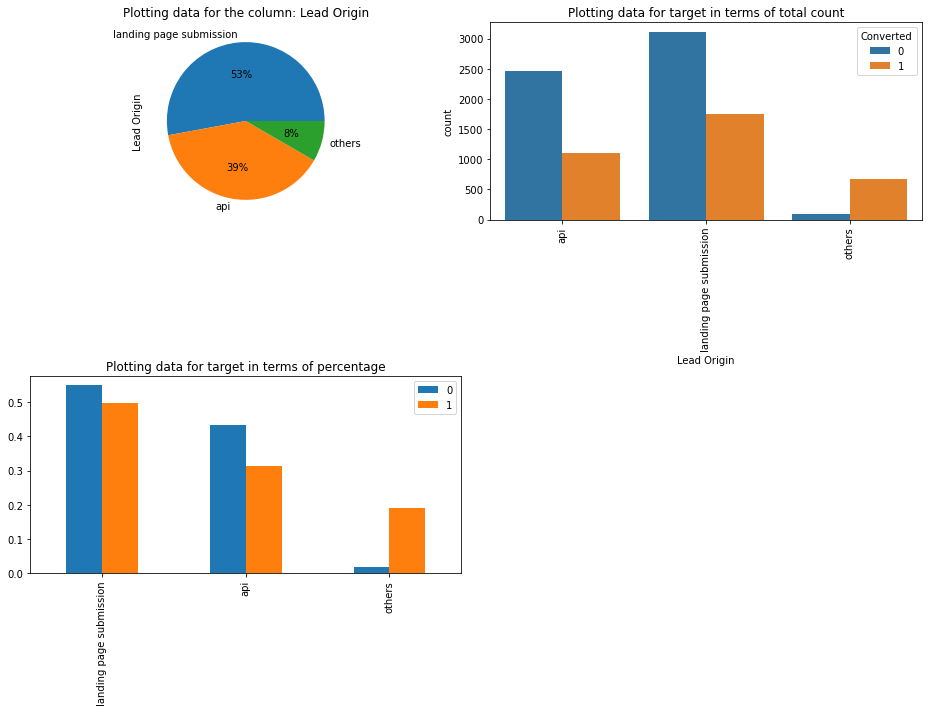

----------------------------------------------------------------------------------------------
Plotting  Lead Source


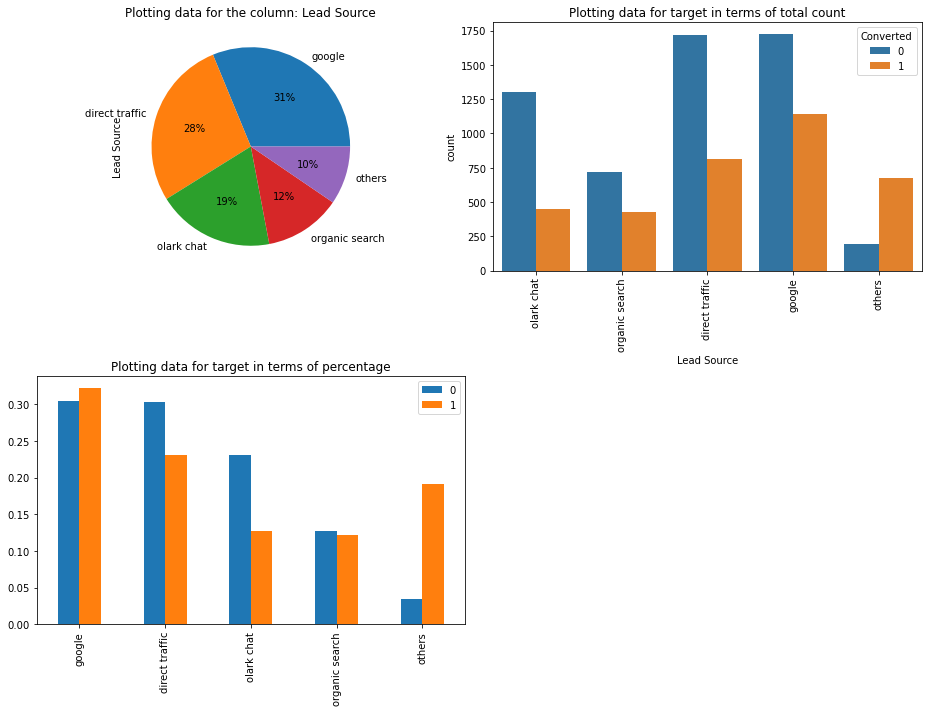

----------------------------------------------------------------------------------------------
Plotting  Specialization


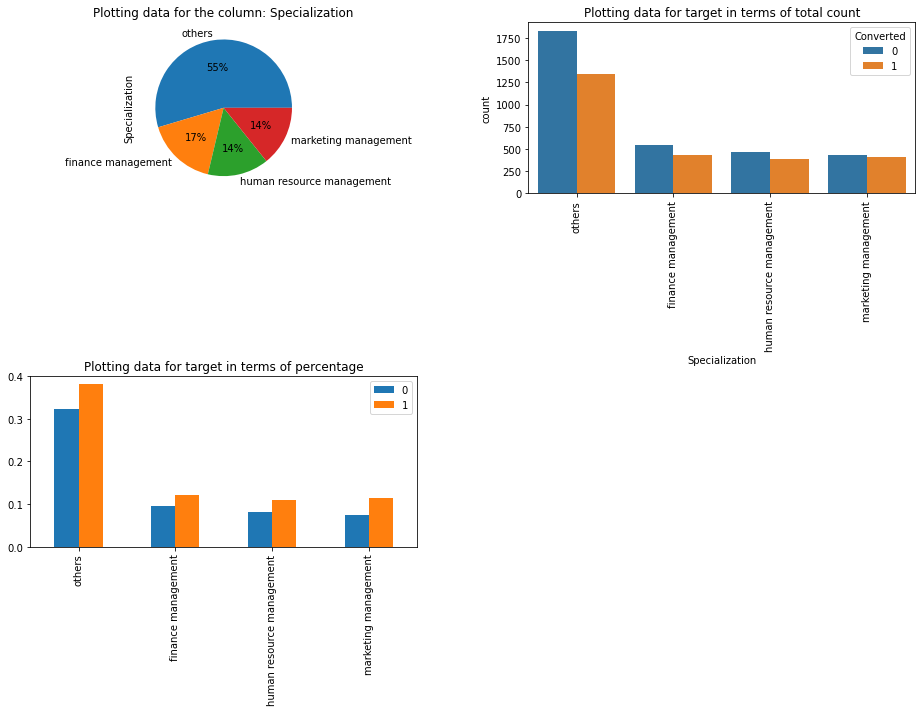

----------------------------------------------------------------------------------------------
Plotting  What is your current occupation


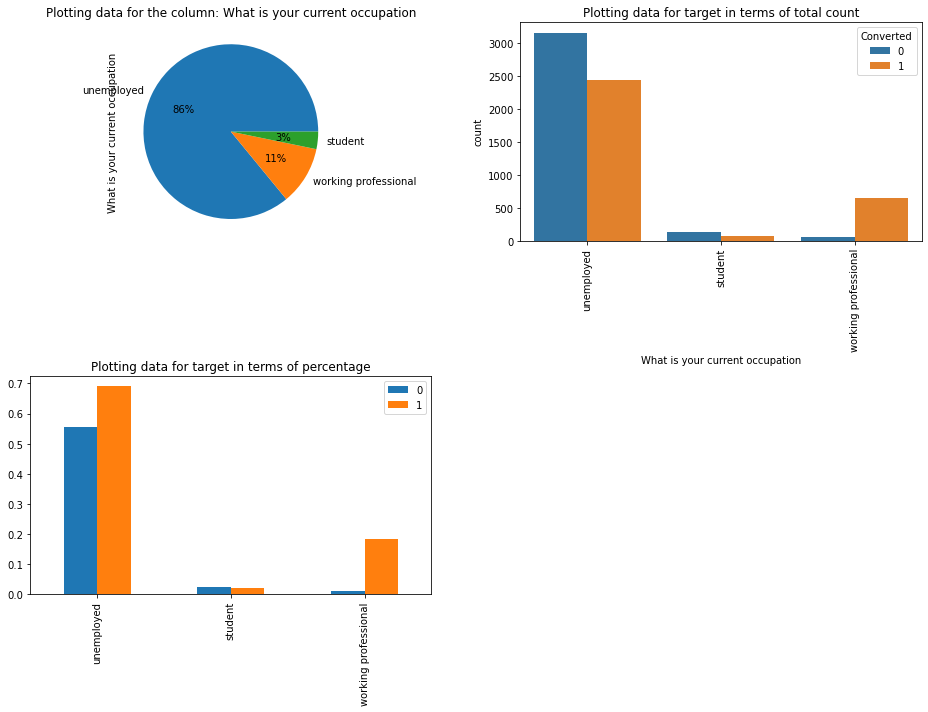

----------------------------------------------------------------------------------------------
Plotting  City


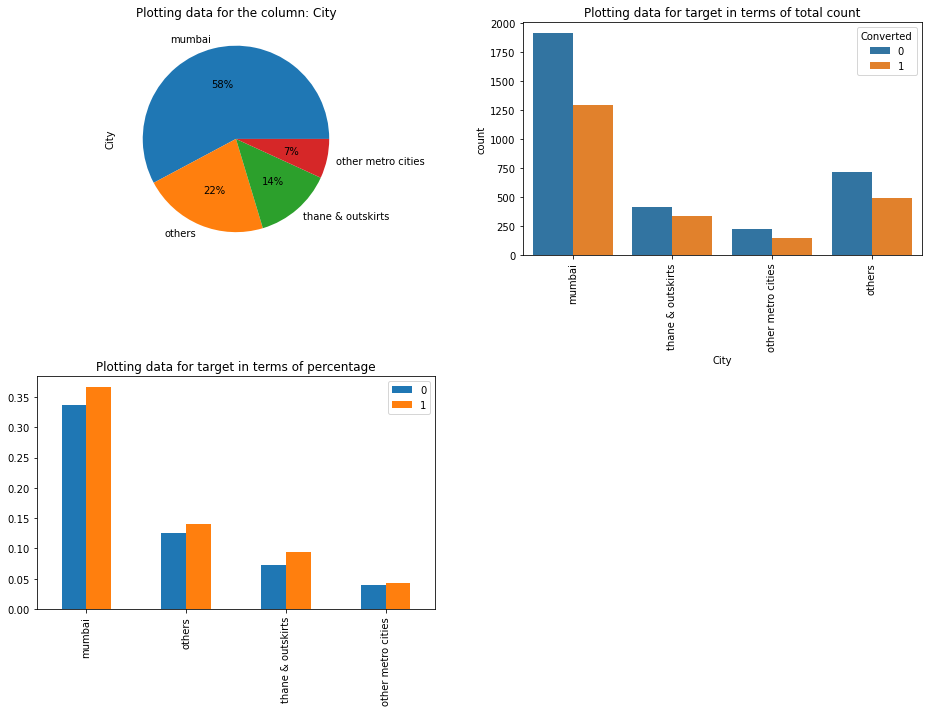

----------------------------------------------------------------------------------------------
Plotting  A free copy of Mastering The Interview


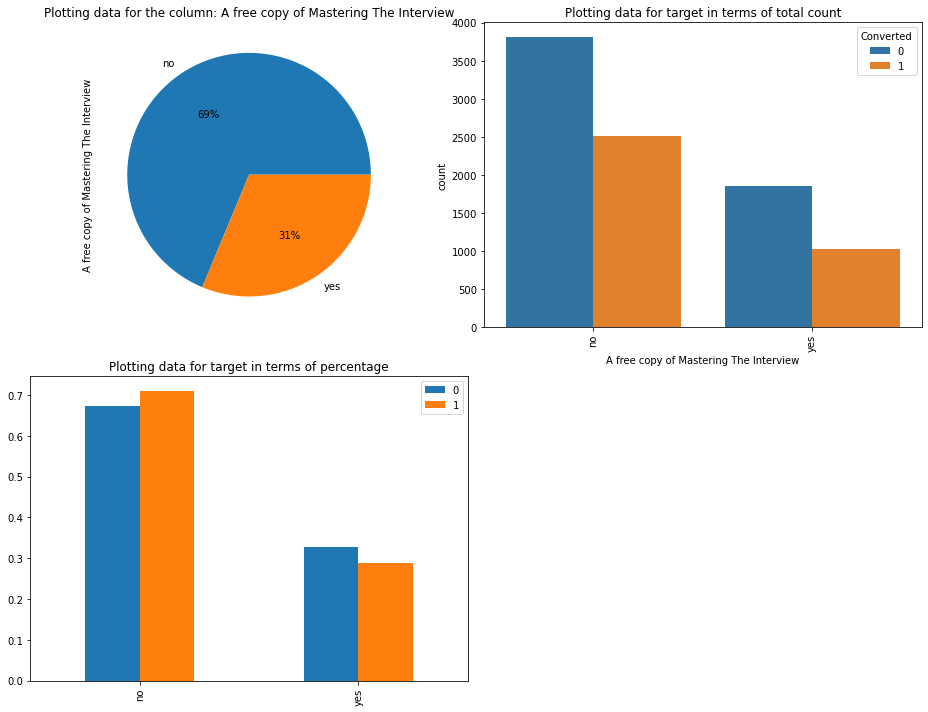

----------------------------------------------------------------------------------------------


In [538]:
for column in train_categorical:
    print("Plotting ", column)
    plotting(leadScore_df, train_0, train_1, column)
    print('----------------------------------------------------------------------------------------------')

### Checking for outliers

In [539]:
leadScore_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Converted  TotalVisits  Total Time Spent on Website  \
count  9206.000000  9071.000000                  9206.000000   
mean      0.384097     3.438761                   486.724527   
std       0.486408     4.851939                   547.600126   
min       0.000000     0.000000                     0.000000   
25%       0.000000     1.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   933.000000   
90%       1.000000     7.000000                  1379.000000   
95%       1.000000    10.000000                  1560.500000   
99%       1.000000    17.000000                  1840.950000   
max       1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9071.000000  
mean               2.360503  
std                2.159356  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.000000  
90%                5.000000  
95%                6.000000  
99%                9.000000  
max               55.000000

In [540]:
leadScore_df['TotalVisits']=leadScore_df['TotalVisits'].replace(np.NaN,0)

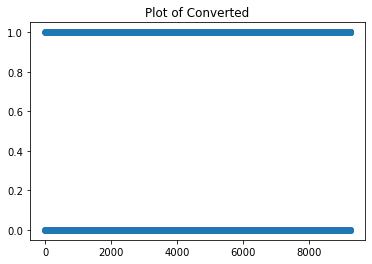

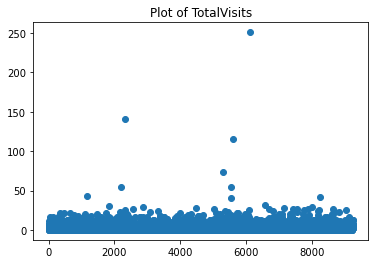

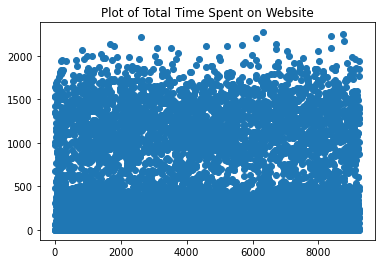

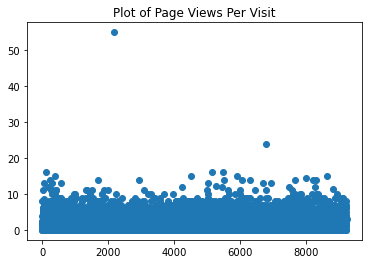

In [541]:
train_numerical = leadScore_df.select_dtypes(include=['int64', 'float64']).columns

for column in train_numerical:
    title = "Plot of "+column
    plt.scatter(leadScore_df.index, leadScore_df[column])
    plt.title(title)
    plt.show()

In [542]:

#Handling the upper bound outliers in TotalVisits
outliers=[]
q1 = np.percentile(leadScore_df['TotalVisits'], 25)
q3 = np.percentile(leadScore_df['TotalVisits'], 75)
IQR = q3-q1
lower_bound = q1-(1.5*IQR)
upper_bound = q3+(1.5*IQR)
print(q1, q3, IQR, lower_bound, upper_bound)
for i in leadScore_df['TotalVisits']: 
        if ( i>upper_bound):#i<lower_bound or
            outliers.append(i)
#ninetieth_percentile = np.percentile(new_app_data1['YEARSEMPLOYEED'], 90)
leadScore_df['TotalVisits'] = np.where(leadScore_df['TotalVisits']>upper_bound, upper_bound, leadScore_df['TotalVisits'])
#print(upper_bound)
#print(len(outliers))


0.0 5.0 5.0 -7.5 12.5


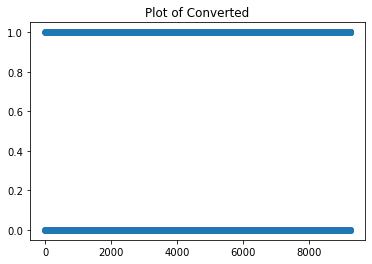

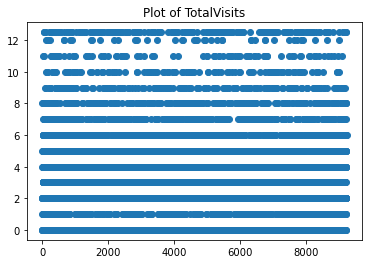

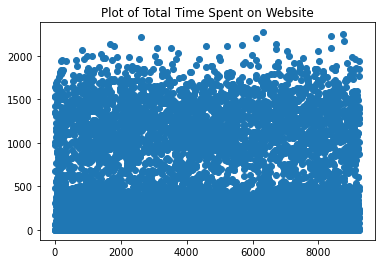

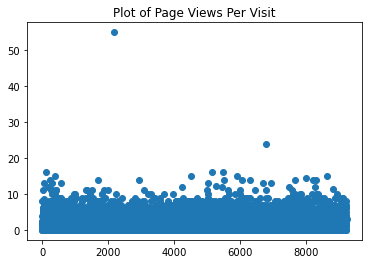

In [543]:
for column in train_numerical:
    title = "Plot of "+column
    plt.scatter(leadScore_df.index, leadScore_df[column])
    plt.title(title)
    plt.show()

In [544]:
leadScore_df.shape

(9206, 11)

In [545]:
rows_detained=leadScore_df.shape[0]
rows_detained

9206

In [547]:
percent_rows_detained=100*(rows_detained/intial_num_rows)
percent_rows_detained

99.63203463203463

### Creating dummies for all categorical columns


In [548]:
# Extracting categorical columns from leadScore_data1 dataframe
cat=leadScore_df.select_dtypes(include="object")
print(cat.columns)
print(len(cat.columns))

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Specialization',
       'What is your current occupation', 'City',
       'A free copy of Mastering The Interview'],
      dtype='object')
7


In [549]:
leadScore_df.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      api   
1  2a272436-5132-4136-86fa-dcc88c88f482                      api   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  landing page submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  landing page submission   
4  3256f628-e534-4826-9d63-4a8b88782852  landing page submission   

      Lead Source  Converted  TotalVisits  Total Time Spent on Website  \
0      olark chat          0          0.0                            0   
1  organic search          0          5.0                          674   
2  direct traffic          1          2.0                         1532   
3  direct traffic          0          1.0                          305   
4          google          1          2.0                         1428   

   Page Views Per Visit Specialization What is your current occupation  \
0                   0.0            NaN                      unemployed   
1                   2.5            NaN                      unemployed   
2                   2.0         others                         student   
3                   1.0         others                      unemployed   
4                   1.0            NaN                      unemployed   

     City A free copy of Mastering The Interview  
0     NaN                                     no  
1     NaN                                     no  
2  mumbai                                    yes  
3  mumbai                                     no  
4  mumbai                                     no

In [550]:
leadScore_df.shape

(9206, 11)

In [551]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.

dummy1 = pd.get_dummies(leadScore_df[['Lead Origin', 'Lead Source', 'Specialization','What is your current occupation', 'City','A free copy of Mastering The Interview']], drop_first=True)

# Adding the results to the master dataframe
leadScore_df = pd.concat([leadScore_df, dummy1], axis=1)

In [552]:
leadScore_df.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      api   
1  2a272436-5132-4136-86fa-dcc88c88f482                      api   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  landing page submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  landing page submission   
4  3256f628-e534-4826-9d63-4a8b88782852  landing page submission   

      Lead Source  Converted  TotalVisits  Total Time Spent on Website  \
0      olark chat          0          0.0                            0   
1  organic search          0          5.0                          674   
2  direct traffic          1          2.0                         1532   
3  direct traffic          0          1.0                          305   
4          google          1          2.0                         1428   

   Page Views Per Visit Specialization What is your current occupation  \
0                   0.0            NaN                      unemployed   
1                   2.5            NaN                      unemployed   
2                   2.0         others                         student   
3                   1.0         others                      unemployed   
4                   1.0            NaN                      unemployed   

     City  ... Lead Source_others  Specialization_human resource management  \
0     NaN  ...                  0                                         0   
1     NaN  ...                  0                                         0   
2  mumbai  ...                  0                                         0   
3  mumbai  ...                  0                                         0   
4  mumbai  ...                  0                                         0   

   Specialization_marketing management  Specialization_others  \
0                                    0                      0   
1                                    0                      0   
2                                    0                      1   
3                                    0                      1   
4                                    0                      0   

   What is your current occupation_unemployed  \
0                                           1   
1                                           1   
2                                           0   
3                                           1   
4                                           1   

   What is your current occupation_working professional  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   City_other metro cities  City_others  City_thane & outskirts  \
0                        0            0                       0   
1                        0            0                       0   
2                        0            0                       0   
3                        0            0                       0   
4                        0            0                       0   

   A free copy of Mastering The Interview_yes  
0                                           0  
1                                           0  
2                                           1  
3                                           0  
4                                           0  

[5 rows x 26 columns]

In [553]:
leadScore_df.shape

(9206, 26)

In [554]:
leadScore_df.isnull().sum()

Prospect ID                                                0
Lead Origin                                                0
Lead Source                                               36
Converted                                                  0
TotalVisits                                                0
Total Time Spent on Website                                0
Page Views Per Visit                                     135
Specialization                                          3377
What is your current occupation                         2690
City                                                    3661
A free copy of Mastering The Interview                     0
Lead Origin_landing page submission                        0
Lead Origin_others                                         0
Lead Source_google                                         0
Lead Source_olark chat                                     0
Lead Source_organic search                                 0
Lead Source_others      

In [555]:
# Deleting the original features
leadScore_df1=leadScore_df.drop(['Lead Origin', 'Lead Source', 'Specialization','What is your current occupation', 'City','A free copy of Mastering The Interview'],axis=1)
leadScore_df1.head()

Prospect ID  Converted  TotalVisits  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620          0          0.0   
1  2a272436-5132-4136-86fa-dcc88c88f482          0          5.0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a          1          2.0   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc          0          1.0   
4  3256f628-e534-4826-9d63-4a8b88782852          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  \
0                            0                   0.0   
1                          674                   2.5   
2                         1532                   2.0   
3                          305                   1.0   
4                         1428                   1.0   

   Lead Origin_landing page submission  Lead Origin_others  \
0                                    0                   0   
1                                    0                   0   
2                                    1                   0   
3                                    1                   0   
4                                    1                   0   

   Lead Source_google  Lead Source_olark chat  Lead Source_organic search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead Source_others  Specialization_human resource management  \
0                   0                                         0   
1                   0                                         0   
2                   0                                         0   
3                   0                                         0   
4                   0                                         0   

   Specialization_marketing management  Specialization_others  \
0                                    0                      0   
1                                    0                      0   
2                                    0                      1   
3                                    0                      1   
4                                    0                      0   

   What is your current occupation_unemployed  \
0                                           1   
1                                           1   
2                                           0   
3                                           1   
4                                           1   

   What is your current occupation_working professional  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   City_other metro cities  City_others  City_thane & outskirts  \
0                        0            0                       0   
1                        0            0                       0   
2                        0            0                       0   
3                        0            0                       0   
4                        0            0                       0   

   A free copy of Mastering The Interview_yes  
0                                           0  
1                                           0  
2                                           1  
3                                           0  
4                                           0

In [556]:
# Adding up the missing values (column-wise)
leadScore_df1.isnull().sum()


Prospect ID                                               0
Converted                                                 0
TotalVisits                                               0
Total Time Spent on Website                               0
Page Views Per Visit                                    135
Lead Origin_landing page submission                       0
Lead Origin_others                                        0
Lead Source_google                                        0
Lead Source_olark chat                                    0
Lead Source_organic search                                0
Lead Source_others                                        0
Specialization_human resource management                  0
Specialization_marketing management                       0
Specialization_others                                     0
What is your current occupation_unemployed                0
What is your current occupation_working professional      0
City_other metro cities                 

In [557]:
leadScore_df1['Page Views Per Visit'].isnull().sum()

135

In [558]:
leadScore_df1.dtypes

Prospect ID                                              object
Converted                                                 int64
TotalVisits                                             float64
Total Time Spent on Website                               int64
Page Views Per Visit                                    float64
Lead Origin_landing page submission                       uint8
Lead Origin_others                                        uint8
Lead Source_google                                        uint8
Lead Source_olark chat                                    uint8
Lead Source_organic search                                uint8
Lead Source_others                                        uint8
Specialization_human resource management                  uint8
Specialization_marketing management                       uint8
Specialization_others                                     uint8
What is your current occupation_unemployed                uint8
What is your current occupation_working 

In [559]:
leadScore_df1['Page Views Per Visit']

0        0.00
1        2.50
2        2.00
3        1.00
4        1.00
5        0.00
6        2.00
7        0.00
8        2.00
9        4.00
10       8.00
11       2.67
12      11.00
13       5.00
14       1.00
15       6.00
16       0.00
17       6.00
18       3.00
19       3.00
20       1.00
21       1.33
22       1.00
23       4.00
24       1.50
25       3.00
26       2.00
27       6.00
28       5.00
29       3.00
30       3.50
31       1.50
32       2.00
33       1.50
34       2.00
35       3.00
36       4.00
37       5.00
38       2.00
39       4.00
40       3.00
41       7.00
42       5.00
43       5.00
44       3.00
45       2.00
46       2.00
47       0.00
48       6.00
49       0.00
50       0.00
51       5.00
52       2.00
53       1.50
54       2.33
55       2.00
56      13.00
57       8.00
58       8.50
59       5.50
60       4.00
61       0.00
62       3.50
63       0.00
64       4.00
65       1.00
66       1.50
67       0.00
68       0.00
69       0.00
70       1.00
71    

In [560]:
leadScore_df1['Page Views Per Visit'].mean()

2.360502700915004

In [561]:
# imputing the missing values with mean

leadScore_df1['Page Views Per Visit'].fillna(leadScore_df1['Page Views Per Visit'].mean(),inplace=True)


In [562]:
leadScore_df1.isnull().sum()

Prospect ID                                             0
Converted                                               0
TotalVisits                                             0
Total Time Spent on Website                             0
Page Views Per Visit                                    0
Lead Origin_landing page submission                     0
Lead Origin_others                                      0
Lead Source_google                                      0
Lead Source_olark chat                                  0
Lead Source_organic search                              0
Lead Source_others                                      0
Specialization_human resource management                0
Specialization_marketing management                     0
Specialization_others                                   0
What is your current occupation_unemployed              0
What is your current occupation_working professional    0
City_other metro cities                                 0
City_others   

### Heat map for all the variables

In [563]:
### Corelation between all the variables
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

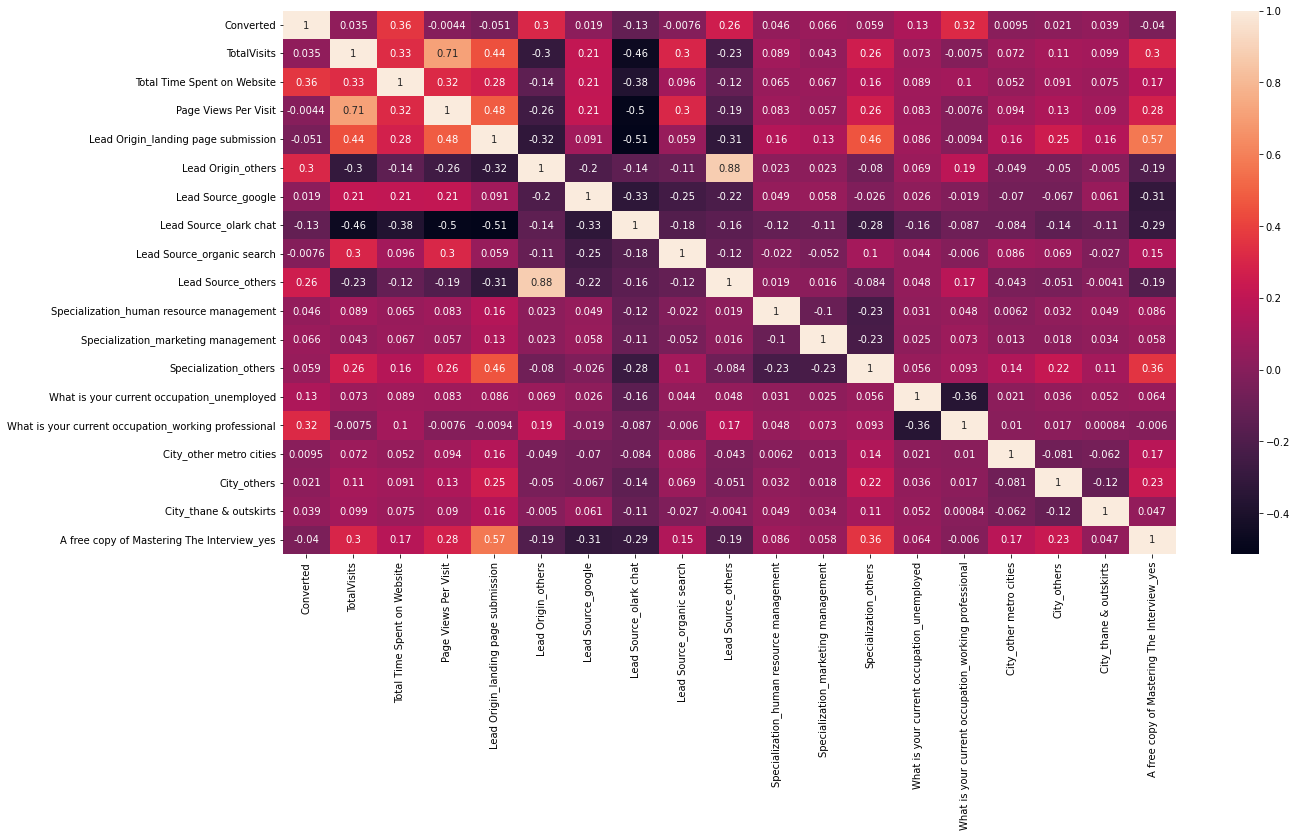

In [564]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(leadScore_df1.corr(),annot = True)
plt.show()

### Train - Test split


In [565]:
from sklearn.model_selection import train_test_split

In [566]:
# Creating X as input variable
X = leadScore_df1.drop(['Converted'], 1)
X.head()


Prospect ID  TotalVisits  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620          0.0   
1  2a272436-5132-4136-86fa-dcc88c88f482          5.0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a          2.0   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc          1.0   
4  3256f628-e534-4826-9d63-4a8b88782852          2.0   

   Total Time Spent on Website  Page Views Per Visit  \
0                            0                   0.0   
1                          674                   2.5   
2                         1532                   2.0   
3                          305                   1.0   
4                         1428                   1.0   

   Lead Origin_landing page submission  Lead Origin_others  \
0                                    0                   0   
1                                    0                   0   
2                                    1                   0   
3                                    1                   0   
4                                    1                   0   

   Lead Source_google  Lead Source_olark chat  Lead Source_organic search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead Source_others  Specialization_human resource management  \
0                   0                                         0   
1                   0                                         0   
2                   0                                         0   
3                   0                                         0   
4                   0                                         0   

   Specialization_marketing management  Specialization_others  \
0                                    0                      0   
1                                    0                      0   
2                                    0                      1   
3                                    0                      1   
4                                    0                      0   

   What is your current occupation_unemployed  \
0                                           1   
1                                           1   
2                                           0   
3                                           1   
4                                           1   

   What is your current occupation_working professional  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   City_other metro cities  City_others  City_thane & outskirts  \
0                        0            0                       0   
1                        0            0                       0   
2                        0            0                       0   
3                        0            0                       0   
4                        0            0                       0   

   A free copy of Mastering The Interview_yes  
0                                           0  
1                                           0  
2                                           1  
3                                           0  
4                                           0

In [567]:
X = X.drop(['Prospect ID'], 1)

In [568]:
X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   Lead Origin_landing page submission  Lead Origin_others  \
0                                    0                   0   
1                                    0                   0   
2                                    1                   0   
3                                    1                   0   
4                                    1                   0   

   Lead Source_google  Lead Source_olark chat  Lead Source_organic search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead Source_others  Specialization_human resource management  \
0                   0                                         0   
1                   0                                         0   
2                   0                                         0   
3                   0                                         0   
4                   0                                         0   

   Specialization_marketing management  Specialization_others  \
0                                    0                      0   
1                                    0                      0   
2                                    0                      1   
3                                    0                      1   
4                                    0                      0   

   What is your current occupation_unemployed  \
0                                           1   
1                                           1   
2                                           0   
3                                           1   
4                                           1   

   What is your current occupation_working professional  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   City_other metro cities  City_others  City_thane & outskirts  \
0                        0            0                       0   
1                        0            0                       0   
2                        0            0                       0   
3                        0            0                       0   
4                        0            0                       0   

   A free copy of Mastering The Interview_yes  
0                                           0  
1                                           0  
2                                           1  
3                                           0  
4                                           0

In [570]:
# Creating y as output variable
y = leadScore_df1['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [571]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [572]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
6760         0.96                     0.794454              0.125000   
2180         0.24                     0.080106              0.125000   
5956         0.00                     0.000000              0.000000   
8885         0.32                     0.589789              0.083333   
8719         0.24                     0.602113              0.062500   

      Lead Origin_landing page submission  Lead Origin_others  \
6760                                    1                   0   
2180                                    1                   0   
5956                                    0                   0   
8885                                    1                   0   
8719                                    1                   0   

      Lead Source_google  Lead Source_olark chat  Lead Source_organic search  \
6760                   0                       0                           1   
2180                   0                       0                           0   
5956                   0                       1                           0   
8885                   1                       0                           0   
8719                   0                       0                           0   

      Lead Source_others  Specialization_human resource management  \
6760                   0                                         0   
2180                   0                                         0   
5956                   0                                         0   
8885                   0                                         1   
8719                   0                                         0   

      Specialization_marketing management  Specialization_others  \
6760                                    0                      1   
2180                                    0                      1   
5956                                    0                      0   
8885                                    0                      0   
8719                                    0                      0   

      What is your current occupation_unemployed  \
6760                                           1   
2180                                           0   
5956                                           1   
8885                                           1   
8719                                           1   

      What is your current occupation_working professional  \
6760                                                  0      
2180                                                  0      
5956                                                  0      
8885                                                  0      
8719                                                  0      

      City_other metro cities  City_others  City_thane & outskirts  \
6760                        0            0                       0   
2180                        0            0                       1   
5956                        0            0                       0   
8885                        0            0                       0   
8719                        0            0                       0   

      A free copy of Mastering The Interview_yes  
6760                                           1  
2180                                           1  
5956                                           0  
8885                                           0  
8719                                           1

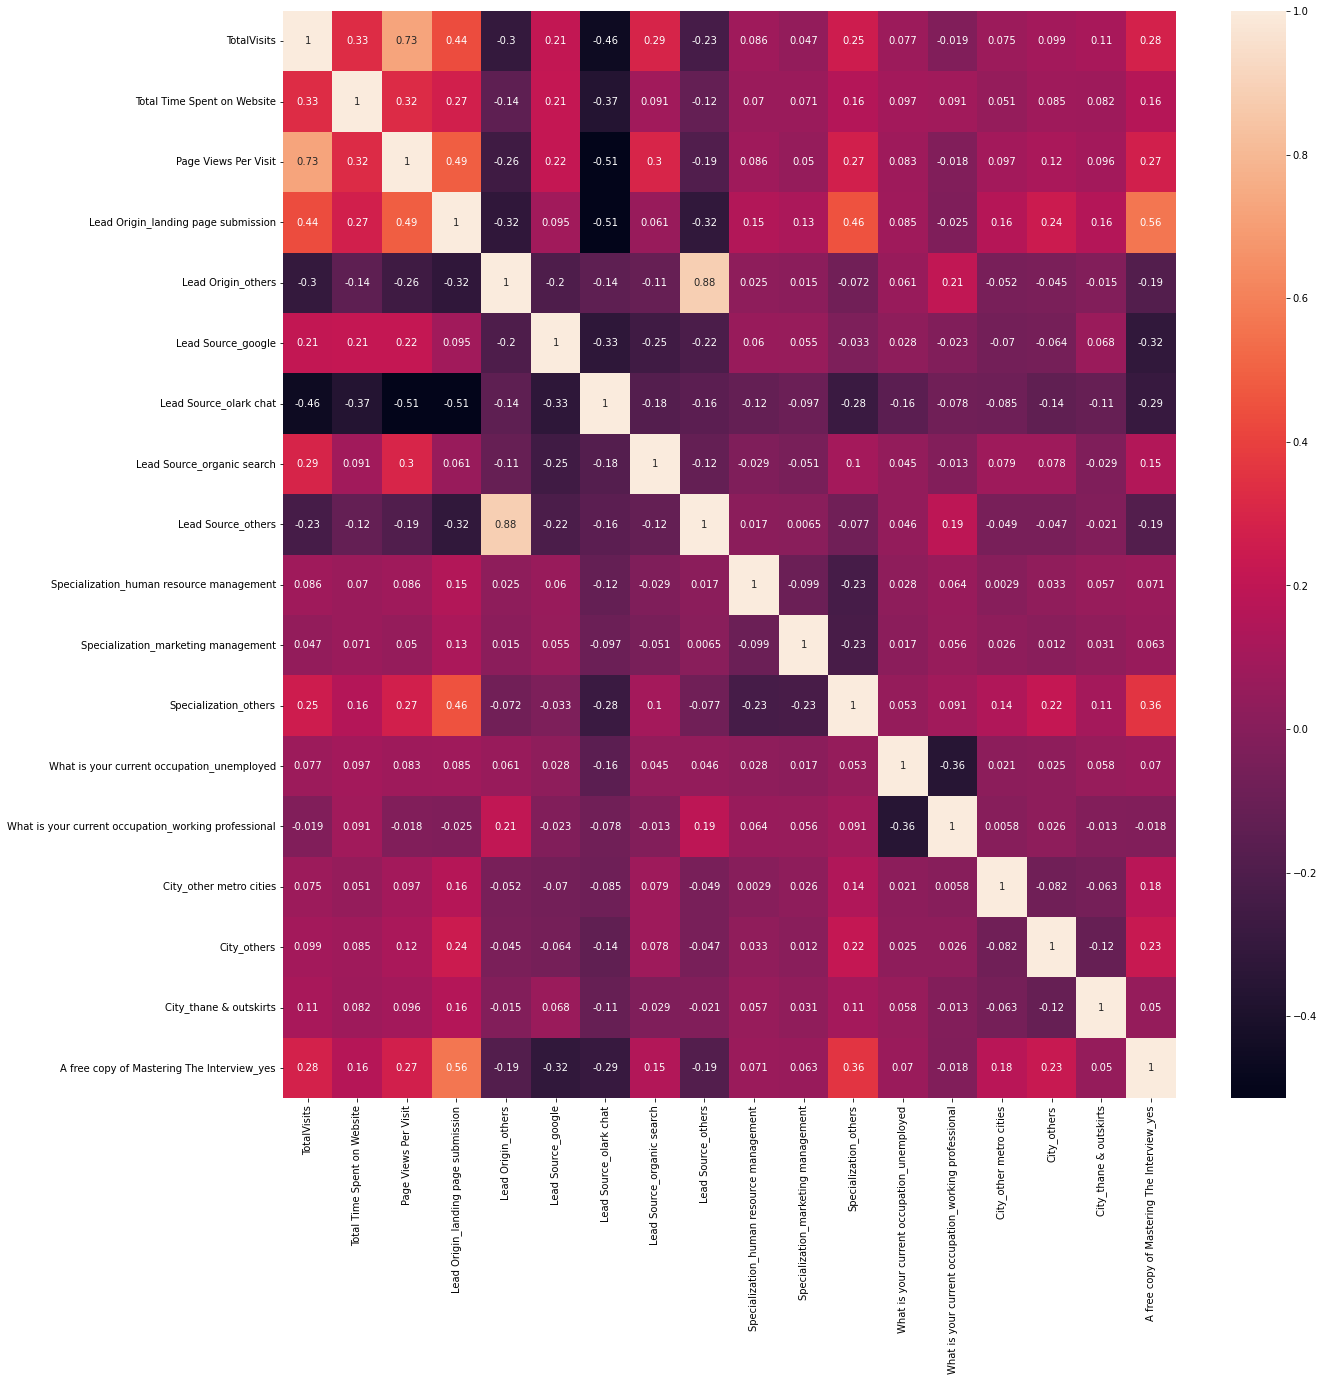

In [574]:
# To check the correlation among varibles
plt.figure(figsize=(20,20))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

## Model 1

In [575]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [576]:
X_train.shape

(6444, 18)

In [577]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=16)             # running RFE with 16 variables as output
rfe = rfe.fit(X_train, y_train)

In [578]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_landing page submission', True, 1),
 ('Lead Origin_others', True, 1),
 ('Lead Source_google', True, 1),
 ('Lead Source_olark chat', True, 1),
 ('Lead Source_organic search', True, 1),
 ('Lead Source_others', False, 3),
 ('Specialization_human resource management', True, 1),
 ('Specialization_marketing management', True, 1),
 ('Specialization_others', True, 1),
 ('What is your current occupation_unemployed', True, 1),
 ('What is your current occupation_working professional', True, 1),
 ('City_other metro cities', True, 1),
 ('City_others', True, 1),
 ('City_thane & outskirts', True, 1),
 ('A free copy of Mastering The Interview_yes', False, 2)]

In [579]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [580]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [581]:
X_train.dtypes

TotalVisits                                             float64
Total Time Spent on Website                             float64
Page Views Per Visit                                    float64
Lead Origin_landing page submission                       uint8
Lead Origin_others                                        uint8
Lead Source_google                                        uint8
Lead Source_olark chat                                    uint8
Lead Source_organic search                                uint8
Specialization_human resource management                  uint8
Specialization_marketing management                       uint8
Specialization_others                                     uint8
What is your current occupation_unemployed                uint8
What is your current occupation_working professional      uint8
City_other metro cities                                   uint8
City_others                                               uint8
City_thane & outskirts                  

In [582]:
# Importing statsmodels
import statsmodels.api as sm

In [583]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6444
Model:                            GLM   Df Residuals:                     6427
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2926.3
Date:                Tue, 18 Oct 2022   Deviance:                       5852.7
Time:                        17:09:52   Pearson chi2:                 7.19e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3450
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.5461      0.141    -25.229      0.000      -3.822      -3.271
TotalVisits                                              1.2096      0.199      6.088      0.000       0.820       1.599
Total Time Spent on Website                              4.5024      0.159     28.382      0.000       4.191       4.813
Page Views Per Visit                                    -1.9573      0.576     -3.400      0.001      -3.086      -0.829
Lead Origin_landing page submission                     -0.2037      0.106     -1.920      0.055      -0.412       0.004
Lead Origin_others                                       3.7525      0.187     20.038      0.000       3.386       4.120
Lead Source_google                                       0.4394      0.089      4.937      0.000       0.265       0.614
Lead Source_olark chat                                   1.4225      0.142     10.009      0.000       1.144       1.701
Lead Source_organic search                               0.1913      0.116      1.646      0.100      -0.037       0.419
Specialization_human resource management                 0.1741      0.129      1.345      0.179      -0.080       0.428
Specialization_marketing management                      0.3677      0.128      2.866      0.004       0.116       0.619
Specialization_others                                    0.3235      0.094      3.423      0.001       0.138       0.509
What is your current occupation_unemployed               1.2816      0.080     16.102      0.000       1.126       1.438
What is your current occupation_working professional     3.7447      0.191     19.648      0.000       3.371       4.118
City_other metro cities                                  0.2233      0.160      1.394      0.163      -0.091       0.537
City_others                                              0.1408      0.103      1.364      0.172      -0.061       0.343
City_thane & outskirts                                   0.2016      0.120      1.675      0.094      -0.034       0.438
========================================================================================================================
"""

In [584]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [585]:

# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                                Page Views Per Visit  5.52
0                                         TotalVisits  4.89
3                 Lead Origin_landing page submission  4.50
10                              Specialization_others  2.89
11         What is your current occupation_unemployed  2.81
1                         Total Time Spent on Website  2.17
5                                  Lead Source_google  1.82
7                          Lead Source_organic search  1.51
8            Specialization_human resource management  1.44
4                                  Lead Origin_others  1.42
9                 Specialization_marketing management  1.40
12  What is your current occupation_working profes...  1.39
14                                        City_others  1.33
6                              Lead Source_olark chat  1.19
15                             City_thane & outskirts  1.18
13                            City_other metro cities  1.13

In [586]:
# Dropping the feature having highest p-value Specialization_human resource management

X_train.drop('Specialization_human resource management', axis = 1, inplace = True)

In [587]:
X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
6760         0.96                     0.794454              0.125000   
2180         0.24                     0.080106              0.125000   
5956         0.00                     0.000000              0.000000   
8885         0.32                     0.589789              0.083333   
8719         0.24                     0.602113              0.062500   

      Lead Origin_landing page submission  Lead Origin_others  \
6760                                    1                   0   
2180                                    1                   0   
5956                                    0                   0   
8885                                    1                   0   
8719                                    1                   0   

      Lead Source_google  Lead Source_olark chat  Lead Source_organic search  \
6760                   0                       0                           1   
2180                   0                       0                           0   
5956                   0                       1                           0   
8885                   1                       0                           0   
8719                   0                       0                           0   

      Specialization_marketing management  Specialization_others  \
6760                                    0                      1   
2180                                    0                      1   
5956                                    0                      0   
8885                                    0                      0   
8719                                    0                      0   

      What is your current occupation_unemployed  \
6760                                           1   
2180                                           0   
5956                                           1   
8885                                           1   
8719                                           1   

      What is your current occupation_working professional  \
6760                                                  0      
2180                                                  0      
5956                                                  0      
8885                                                  0      
8719                                                  0      

      City_other metro cities  City_others  City_thane & outskirts  
6760                        0            0                       0  
2180                        0            0                       1  
5956                        0            0                       0  
8885                        0            0                       0  
8719                        0            0                       0

### Model 2

In [588]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6444
Model:                            GLM   Df Residuals:                     6428
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2927.2
Date:                Tue, 18 Oct 2022   Deviance:                       5854.5
Time:                        17:12:43   Pearson chi2:                 7.13e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3448
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.5458      0.141    -25.232      0.000      -3.821      -3.270
TotalVisits                                              1.2203      0.198      6.148      0.000       0.831       1.609
Total Time Spent on Website                              4.5150      0.159     28.484      0.000       4.204       4.826
Page Views Per Visit                                    -1.9402      0.575     -3.374      0.001      -3.067      -0.813
Lead Origin_landing page submission                     -0.1613      0.101     -1.595      0.111      -0.360       0.037
Lead Origin_others                                       3.7732      0.187     20.210      0.000       3.407       4.139
Lead Source_google                                       0.4426      0.089      4.974      0.000       0.268       0.617
Lead Source_olark chat                                   1.4278      0.142     10.055      0.000       1.149       1.706
Lead Source_organic search                               0.1892      0.116      1.627      0.104      -0.039       0.417
Specialization_marketing management                      0.3153      0.122      2.581      0.010       0.076       0.555
Specialization_others                                    0.2661      0.084      3.161      0.002       0.101       0.431
What is your current occupation_unemployed               1.2868      0.079     16.190      0.000       1.131       1.443
What is your current occupation_working professional     3.7630      0.190     19.804      0.000       3.391       4.135
City_other metro cities                                  0.2325      0.160      1.452      0.147      -0.081       0.546
City_others                                              0.1497      0.103      1.454      0.146      -0.052       0.352
City_thane & outskirts                                   0.2135      0.120      1.778      0.075      -0.022       0.449
========================================================================================================================
"""

In [589]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                                Page Views Per Visit  5.52
0                                         TotalVisits  4.88
3                 Lead Origin_landing page submission  4.03
10         What is your current occupation_unemployed  2.80
9                               Specialization_others  2.33
1                         Total Time Spent on Website  2.17
5                                  Lead Source_google  1.82
7                          Lead Source_organic search  1.51
4                                  Lead Origin_others  1.39
11  What is your current occupation_working profes...  1.37
13                                        City_others  1.32
8                 Specialization_marketing management  1.28
6                              Lead Source_olark chat  1.19
14                             City_thane & outskirts  1.18
12                            City_other metro cities  1.13

In [590]:
# VIF for Page Views Per Visit is high

X_train.drop('Page Views Per Visit', axis = 1, inplace = True)

### Model 3

In [591]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6444
Model:                            GLM   Df Residuals:                     6429
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2933.0
Date:                Tue, 18 Oct 2022   Deviance:                       5866.0
Time:                        17:14:09   Pearson chi2:                 7.26e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3436
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.6079      0.139    -25.893      0.000      -3.881      -3.335
TotalVisits                                              0.8621      0.168      5.120      0.000       0.532       1.192
Total Time Spent on Website                              4.4976      0.158     28.441      0.000       4.188       4.808
Lead Origin_landing page submission                     -0.2077      0.100     -2.078      0.038      -0.404      -0.012
Lead Origin_others                                       3.8205      0.186     20.519      0.000       3.456       4.185
Lead Source_google                                       0.4171      0.088      4.715      0.000       0.244       0.590
Lead Source_olark chat                                   1.4905      0.141     10.592      0.000       1.215       1.766
Lead Source_organic search                               0.1275      0.115      1.113      0.266      -0.097       0.352
Specialization_marketing management                      0.3125      0.122      2.562      0.010       0.073       0.552
Specialization_others                                    0.2549      0.084      3.038      0.002       0.090       0.419
What is your current occupation_unemployed               1.2841      0.079     16.175      0.000       1.129       1.440
What is your current occupation_working professional     3.7525      0.190     19.765      0.000       3.380       4.125
City_other metro cities                                  0.2219      0.160      1.387      0.165      -0.092       0.536
City_others                                              0.1499      0.103      1.457      0.145      -0.052       0.352
City_thane & outskirts                                   0.2210      0.120      1.843      0.065      -0.014       0.456
========================================================================================================================
"""

In [592]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                 Lead Origin_landing page submission  3.77
0                                         TotalVisits  3.24
9          What is your current occupation_unemployed  2.79
8                               Specialization_others  2.33
1                         Total Time Spent on Website  2.16
4                                  Lead Source_google  1.76
6                          Lead Source_organic search  1.44
3                                  Lead Origin_others  1.39
10  What is your current occupation_working profes...  1.37
12                                        City_others  1.32
7                 Specialization_marketing management  1.28
5                              Lead Source_olark chat  1.19
13                             City_thane & outskirts  1.18
11                            City_other metro cities  1.13

In [593]:
# P-value for Lead Source_organic search is high

X_train.drop('Lead Source_organic search', axis = 1, inplace = True)

### Model 4

In [594]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6444
Model:                            GLM   Df Residuals:                     6430
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2933.6
Date:                Tue, 18 Oct 2022   Deviance:                       5867.3
Time:                        17:15:14   Pearson chi2:                 7.26e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3435
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.5613      0.133    -26.857      0.000      -3.821      -3.301
TotalVisits                                              0.9034      0.164      5.503      0.000       0.582       1.225
Total Time Spent on Website                              4.4953      0.158     28.434      0.000       4.185       4.805
Lead Origin_landing page submission                     -0.2357      0.097     -2.435      0.015      -0.425      -0.046
Lead Origin_others                                       3.7724      0.181     20.845      0.000       3.418       4.127
Lead Source_google                                       0.3729      0.079      4.726      0.000       0.218       0.528
Lead Source_olark chat                                   1.4417      0.134     10.797      0.000       1.180       1.703
Specialization_marketing management                      0.3083      0.122      2.529      0.011       0.069       0.547
Specialization_others                                    0.2569      0.084      3.063      0.002       0.093       0.421
What is your current occupation_unemployed               1.2855      0.079     16.195      0.000       1.130       1.441
What is your current occupation_working professional     3.7541      0.190     19.773      0.000       3.382       4.126
City_other metro cities                                  0.2261      0.160      1.415      0.157      -0.087       0.539
City_others                                              0.1534      0.103      1.492      0.136      -0.048       0.355
City_thane & outskirts                                   0.2182      0.120      1.820      0.069      -0.017       0.453
========================================================================================================================
"""

In [595]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                 Lead Origin_landing page submission  3.73
0                                         TotalVisits  2.82
8          What is your current occupation_unemployed  2.72
7                               Specialization_others  2.33
1                         Total Time Spent on Website  2.15
4                                  Lead Source_google  1.57
3                                  Lead Origin_others  1.38
9   What is your current occupation_working profes...  1.36
11                                        City_others  1.32
6                 Specialization_marketing management  1.28
5                              Lead Source_olark chat  1.18
12                             City_thane & outskirts  1.18
10                            City_other metro cities  1.13

In [596]:
# P-value for free copy of Mastering The Interview_yes is high
X_train.drop('City_other metro cities', axis = 1, inplace = True)



### Model 5

In [597]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6444
Model:                            GLM   Df Residuals:                     6431
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2934.6
Date:                Tue, 18 Oct 2022   Deviance:                       5869.3
Time:                        17:16:09   Pearson chi2:                 7.23e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3433
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.5516      0.132    -26.838      0.000      -3.811      -3.292
TotalVisits                                              0.9033      0.164      5.504      0.000       0.582       1.225
Total Time Spent on Website                              4.4964      0.158     28.442      0.000       4.187       4.806
Lead Origin_landing page submission                     -0.2235      0.096     -2.321      0.020      -0.412      -0.035
Lead Origin_others                                       3.7644      0.181     20.818      0.000       3.410       4.119
Lead Source_google                                       0.3604      0.078      4.598      0.000       0.207       0.514
Lead Source_olark chat                                   1.4336      0.133     10.754      0.000       1.172       1.695
Specialization_marketing management                      0.3152      0.122      2.589      0.010       0.077       0.554
Specialization_others                                    0.2687      0.083      3.220      0.001       0.105       0.432
What is your current occupation_unemployed               1.2861      0.079     16.208      0.000       1.131       1.442
What is your current occupation_working professional     3.7574      0.190     19.788      0.000       3.385       4.130
City_others                                              0.1283      0.101      1.268      0.205      -0.070       0.327
City_thane & outskirts                                   0.1973      0.119      1.658      0.097      -0.036       0.430
========================================================================================================================
"""

In [598]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                 Lead Origin_landing page submission  3.67
0                                         TotalVisits  2.82
8          What is your current occupation_unemployed  2.72
7                               Specialization_others  2.30
1                         Total Time Spent on Website  2.15
4                                  Lead Source_google  1.55
3                                  Lead Origin_others  1.38
9   What is your current occupation_working profes...  1.36
6                 Specialization_marketing management  1.28
10                                        City_others  1.28
5                              Lead Source_olark chat  1.18
11                             City_thane & outskirts  1.16

In [599]:
# P value for City_others is high
X_train.drop('City_others', axis = 1, inplace = True)

### Model 6

In [600]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm6 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6444
Model:                            GLM   Df Residuals:                     6432
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2935.4
Date:                Tue, 18 Oct 2022   Deviance:                       5870.9
Time:                        17:16:49   Pearson chi2:                 7.22e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3431
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.5443      0.132    -26.816      0.000      -3.803      -3.285
TotalVisits                                              0.9016      0.164      5.495      0.000       0.580       1.223
Total Time Spent on Website                              4.5002      0.158     28.471      0.000       4.190       4.810
Lead Origin_landing page submission                     -0.2086      0.096     -2.183      0.029      -0.396      -0.021
Lead Origin_others                                       3.7656      0.181     20.824      0.000       3.411       4.120
Lead Source_google                                       0.3521      0.078      4.509      0.000       0.199       0.505
Lead Source_olark chat                                   1.4296      0.133     10.735      0.000       1.169       1.691
Specialization_marketing management                      0.3199      0.122      2.630      0.009       0.081       0.558
Specialization_others                                    0.2825      0.083      3.414      0.001       0.120       0.445
What is your current occupation_unemployed               1.2879      0.079     16.230      0.000       1.132       1.443
What is your current occupation_working professional     3.7610      0.190     19.807      0.000       3.389       4.133
City_thane & outskirts                                   0.1719      0.117      1.467      0.143      -0.058       0.402
========================================================================================================================
"""

In [601]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                 Lead Origin_landing page submission  3.55
0                                         TotalVisits  2.82
8          What is your current occupation_unemployed  2.72
7                               Specialization_others  2.27
1                         Total Time Spent on Website  2.14
4                                  Lead Source_google  1.55
3                                  Lead Origin_others  1.38
9   What is your current occupation_working profes...  1.36
6                 Specialization_marketing management  1.28
5                              Lead Source_olark chat  1.18
10                             City_thane & outskirts  1.13

In [602]:

# P-value for City_thane & outskirts is high
X_train.drop('City_thane & outskirts', axis = 1, inplace = True)



### Model 7

In [605]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm7 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res_final = logm7.fit()
res_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6444
Model:                            GLM   Df Residuals:                     6433
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2936.5
Date:                Tue, 18 Oct 2022   Deviance:                       5873.0
Time:                        17:20:33   Pearson chi2:                 7.23e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3429
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.5491      0.132    -26.864      0.000      -3.808      -3.290
TotalVisits                                              0.9121      0.164      5.565      0.000       0.591       1.233
Total Time Spent on Website                              4.5040      0.158     28.500      0.000       4.194       4.814
Lead Origin_landing page submission                     -0.1948      0.095     -2.049      0.040      -0.381      -0.008
Lead Origin_others                                       3.7792      0.181     20.927      0.000       3.425       4.133
Lead Source_google                                       0.3597      0.078      4.616      0.000       0.207       0.512
Lead Source_olark chat                                   1.4356      0.133     10.789      0.000       1.175       1.696
Specialization_marketing management                      0.3247      0.122      2.669      0.008       0.086       0.563
Specialization_others                                    0.2872      0.083      3.474      0.001       0.125       0.449
What is your current occupation_unemployed               1.2905      0.079     16.268      0.000       1.135       1.446
What is your current occupation_working professional     3.7586      0.190     19.802      0.000       3.387       4.131
========================================================================================================================
"""

In [606]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                Lead Origin_landing page submission  3.52
0                                        TotalVisits  2.82
8         What is your current occupation_unemployed  2.72
7                              Specialization_others  2.26
1                        Total Time Spent on Website  2.14
4                                 Lead Source_google  1.54
3                                 Lead Origin_others  1.37
9  What is your current occupation_working profes...  1.36
6                Specialization_marketing management  1.27
5                             Lead Source_olark chat  1.18

Feature elimintation with high p-value and high VIF is done. Let us find the prediction with the latest model variables

### Predictions

In [607]:
# Predicting the probabilities on the train set
y_train_pred = res_final.predict(X_train_sm)
y_train_pred[:10]

6760    0.907851
2180    0.053306
5956    0.305126
8885    0.701539
8719    0.617144
6479    0.448279
3069    0.986789
2718    0.235670
500     0.208822
8326    0.539528
dtype: float64

In [608]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.90785102, 0.05330579, 0.30512629, 0.70153903, 0.61714439,
       0.44827865, 0.98678867, 0.23566995, 0.20882185, 0.53952849])

In [609]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

Converted  Conversion_Prob
0          1         0.907851
1          0         0.053306
2          1         0.305126
3          1         0.701539
4          1         0.617144

In [610]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted
0          1         0.907851          1
1          0         0.053306          0
2          1         0.305126          0
3          1         0.701539          1
4          1         0.617144          1

### Model Evaluation

In [611]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [612]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3510,  464],
       [ 876, 1594]], dtype=int64)

In [313]:
# Predicted     Not_Converted    Converted
# Actual
# not_Converted        3510       464
# Converted             876      1594

In [613]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7920546244568591

In [614]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [615]:
# Calculating the sensitivity
TP/(TP+FN)

0.6453441295546559

In [616]:
# Calculating the specificity
TN/(TN+FP)

0.883241066935078

___With the current cut off as 0.5 we have around 79% accuracy, sensitivity of around 64% and specificity of around 88%.___

### Optimise Cut off (ROC Curve)

In [617]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [618]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

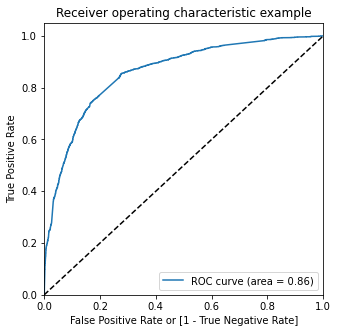

In [619]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [620]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          1         0.907851          1    1    1    1    1    1    1    1   
1          0         0.053306          0    1    0    0    0    0    0    0   
2          1         0.305126          0    1    1    1    1    0    0    0   
3          1         0.701539          1    1    1    1    1    1    1    1   
4          1         0.617144          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  
0    1    1    1  
1    0    0    0  
2    0    0    0  
3    1    0    0  
4    0    0    0

In [621]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

prob  accuracy     sensi     speci
0.0   0.0  0.383302  1.000000  0.000000
0.1   0.1  0.501086  0.985830  0.199799
0.2   0.2  0.700497  0.904049  0.573981
0.3   0.3  0.773277  0.840486  0.731505
0.4   0.4  0.797641  0.710931  0.851535
0.5   0.5  0.792055  0.645344  0.883241
0.6   0.6  0.781192  0.572874  0.910669
0.7   0.7  0.760708  0.475709  0.937846
0.8   0.8  0.738206  0.375709  0.963513
0.9   0.9  0.681409  0.178947  0.993709

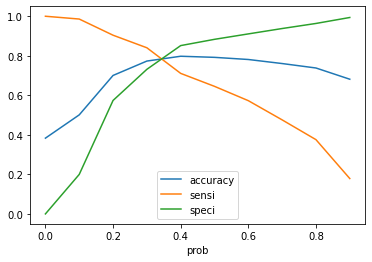

In [622]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [639]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.36 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          1         0.907851          1    1    1    1    1    1    1    1   
1          0         0.053306          0    1    0    0    0    0    0    0   
2          1         0.305126          0    1    1    1    1    0    0    0   
3          1         0.701539          1    1    1    1    1    1    1    1   
4          1         0.617144          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    1    1    1                1  
1    0    0    0                0  
2    0    0    0                0  
3    1    0    0                1  
4    0    0    0                1

In [640]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.797796399751707

In [641]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3304,  670],
       [ 633, 1837]], dtype=int64)

In [642]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [643]:
# Calculating the sensitivity
TP/(TP+FN)

0.7437246963562752

In [644]:
# Calculating the specificity
TN/(TN+FP)

0.8314041268243584

___With the current cut off as 0.36 we have around 79% accuracy, sensitivity of around 74% and specificity of around 83%.___

### Prediction on Test set

In [645]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])


In [646]:
# Substituting all the columns in the final train model
col = X_train.columns

In [648]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

const  TotalVisits  Total Time Spent on Website  \
2399    1.0         0.32                     0.639085   
849     1.0         0.96                     0.029930   
7462    1.0         0.72                     0.182218   
6175    1.0         0.32                     0.828345   
4884    1.0         0.40                     0.218750   
2518    1.0         0.00                     0.000000   
5413    1.0         0.56                     0.426937   
2103    1.0         0.56                     0.413732   
3983    1.0         0.80                     0.670335   
3506    1.0         0.00                     0.000000   
8741    1.0         0.40                     0.250000   
5685    1.0         0.48                     0.221831   
7566    1.0         0.32                     0.528169   
8129    1.0         0.56                     0.422975   
4997    1.0         0.24                     0.162852   
3550    1.0         0.40                     0.278609   
2421    1.0         0.48                     0.027729   
2810    1.0         0.32                     0.188380   
7684    1.0         0.00                     0.000000   
3487    1.0         0.32                     0.731954   
6739    1.0         0.32                     0.031690   
1146    1.0         0.24                     0.492077   
5220    1.0         0.00                     0.000000   
759     1.0         0.32                     0.529489   
8560    1.0         0.16                     0.200264   
8220    1.0         0.40                     0.610915   
3568    1.0         0.08                     0.102553   
8856    1.0         0.00                     0.000000   
9052    1.0         0.08                     0.106954   
7331    1.0         0.24                     0.157570   
4355    1.0         0.00                     0.000000   
9170    1.0         0.00                     0.000000   
2244    1.0         1.00                     0.588028   
3950    1.0         0.00                     0.000000   
2639    1.0         0.16                     0.296215   
6087    1.0         0.00                     0.000000   
5303    1.0         0.48                     0.126761   
8017    1.0         0.32                     0.069542   
2942    1.0         0.00                     0.047975   
2419    1.0         0.40                     0.053257   
7233    1.0         0.16                     0.148768   
8298    1.0         0.08                     0.243838   
5593    1.0         0.40                     0.072183   
1938    1.0         0.32                     0.103433   
8067    1.0         0.16                     0.134683   
7175    1.0         0.08                     0.522007   
4300    1.0         0.16                     0.559419   
3054    1.0         0.16                     0.120599   
6117    1.0         0.16                     0.027289   
3976    1.0         0.80                     0.638204   
2129    1.0         0.48                     0.014965   
4632    1.0         0.08                     0.086268   
7002    1.0         0.00                     0.000000   
4374    1.0         0.80                     0.734595   
8985    1.0         0.16                     0.013644   
1743    1.0         0.16                     0.087588   
8973    1.0         0.24                     0.051496   
4405    1.0         0.00                     0.000000   
8278    1.0         0.32                     0.167694   
1438    1.0         0.64                     0.184419   
2572    1.0         0.40                     0.054577   
5027    1.0         0.16                     0.658451   
8301    1.0         0.00                     0.000000   
7237    1.0         0.48                     0.633363   
8768    1.0         0.32                     0.011884   
3139    1.0         0.00                     0.000000   
7140    1.0         0.32                     0.032130   
4937    1.0         0.24                     0.102993   
8550    1.0         0.00                     0.000000   
6935    1.0     

In [344]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res_final.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

Converted  Conversion_Prob
0          1         0.796393
1          0         0.131045
2          0         0.334309
3          1         0.864901
4          0         0.396776

In [345]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.32 else 0)
y_pred_final

Converted  Conversion_Prob  final_predicted
0             1         0.796393                1
1             0         0.131045                0
2             0         0.334309                1
3             1         0.864901                1
4             0         0.396776                1
5             0         0.107794                0
6             1         0.584200                1
7             1         0.569685                1
8             1         0.982891                1
9             0         0.107794                0
10            0         0.337306                1
11            1         0.369473                1
12            1         0.965527                1
13            0         0.490616                1
14            1         0.784456                1
15            1         0.430648                1
16            0         0.056176                0
17            0         0.123840                0
18            0         0.107794                0
19            0         0.816821                1
20            1         0.117243                0
21            1         0.264756                0
22            1         0.107794                0
23            0         0.603021                1
24            0         0.299229                0
25            1         0.787512                1
26            0         0.173821                0
27            0         0.305126                0
28            0         0.047679                0
29            0         0.293629                0
30            0         0.107794                0
31            0         0.305126                0
32            1         0.525961                1
33            0         0.107794                0
34            1         0.396803                1
35            0         0.107794                0
36            0         0.246009                0
37            0         0.173492                0
38            0         0.850259                1
39            0         0.173437                0
40            0         0.162818                0
41            0         0.269938                0
42            0         0.146358                0
43            0         0.259475                0
44            1         0.181519                0
45            1         0.645169                1
46            0         0.371967                1
47            0         0.054167                0
48            1         0.130412                0
49            1         0.759649                1
50            0         0.049669                0
51            0         0.153860                0
52            0         0.107794                0
53            1         0.866705                1
54            1         0.123600                0
55            0         0.053213                0
56            0         0.152475                0
57            0         0.305126                0
58            0         0.326987                1
59            0         0.328630                1
60            0         0.174291                0
61            1         0.957969                1
62            0         0.107794                0
63            0         0.435703                1
64            0         0.188308                0
65            0         0.107794                0
66            0         0.150641                0
67            0         0.196096                0
68            0         0.305126                0
69            0         0.193373                0
70            1         0.374750                1
71            0         0.074063                0
72            0         0.107794                0
73            1         0.986292                1
74            1         0.820620                1
75            1         0.958552                1
76            1         0.285150                0
77            1         0.915528                1
78            0         0.823313                1
79    

In [649]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7878349022447502

In [650]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1449,  247],
       [ 339,  727]], dtype=int64)

In [651]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [652]:
# Calculating the sensitivity
TP/(TP+FN)

0.6819887429643527

In [653]:
# Calculating the specificity
TN/(TN+FP)

0.8543632075471698

___With the current cut off as 0.5 we have around 68% accuracy, sensitivity of around 68% and specificity of around 85%.___


### Precision-Recall


In [655]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3510,  464],
       [ 876, 1594]], dtype=int64)

In [656]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7745383867832848

In [657]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6453441295546559

___With the current cut off as 0.5 we have around precision around 77% and recall around 64%.___

### Precision and recall tradeoff

In [658]:
from sklearn.metrics import precision_recall_curve

In [659]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       1
 3       1
 4       1
 5       0
 6       1
 7       0
 8       0
 9       1
 10      1
 11      1
 12      0
 13      0
 14      0
 15      0
 16      0
 17      0
 18      0
 19      0
 20      0
 21      0
 22      1
 23      1
 24      0
 25      1
 26      1
 27      0
 28      1
 29      0
 30      0
 31      0
 32      1
 33      0
 34      0
 35      0
 36      0
 37      0
 38      0
 39      0
 40      0
 41      0
 42      1
 43      0
 44      1
 45      1
 46      0
 47      1
 48      0
 49      1
 50      0
 51      0
 52      0
 53      1
 54      0
 55      0
 56      0
 57      0
 58      1
 59      0
 60      1
 61      0
 62      0
 63      1
 64      0
 65      1
 66      1
 67      1
 68      0
 69      1
 70      1
 71      1
 72      0
 73      0
 74      0
 75      1
 76      0
 77      0
 78      1
 79      0
 80      0
 81      0
 82      0
 83      1
 84      1
 85      0
 86      1
 87      0
 88      1
 89      0
 90      0

In [660]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

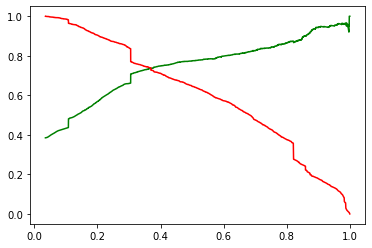

In [661]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [674]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.39 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          1         0.907851          1    1    1    1    1    1    1    1   
1          0         0.053306          0    1    0    0    0    0    0    0   
2          1         0.305126          0    1    1    1    1    0    0    0   
3          1         0.701539          1    1    1    1    1    1    1    1   
4          1         0.617144          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    1    1    1                1  
1    0    0    0                0  
2    0    0    0                0  
3    1    0    0                1  
4    0    0    0                1

In [675]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7973308504034761

In [676]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3372,  602],
       [ 704, 1766]], dtype=int64)

In [678]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [679]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.745777027027027

In [680]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7149797570850203

___With the current cut off as 0.39 we have around 79% accuracy, precision around 74%, recall around 71%.___

### Prediction on Test set

In [682]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res_final.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

Converted  Conversion_Prob
0          1         0.796393
1          0         0.131045
2          0         0.334309
3          1         0.864901
4          0         0.396776

In [685]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.39 else 0)
y_pred_final

Converted  Conversion_Prob  final_predicted
0             1         0.796393                1
1             0         0.131045                0
2             0         0.334309                0
3             1         0.864901                1
4             0         0.396776                1
5             0         0.107794                0
6             1         0.584200                1
7             1         0.569685                1
8             1         0.982891                1
9             0         0.107794                0
10            0         0.337306                0
11            1         0.369473                0
12            1         0.965527                1
13            0         0.490616                1
14            1         0.784456                1
15            1         0.430648                1
16            0         0.056176                0
17            0         0.123840                0
18            0         0.107794                0
19            0         0.816821                1
20            1         0.117243                0
21            1         0.264756                0
22            1         0.107794                0
23            0         0.603021                1
24            0         0.299229                0
25            1         0.787512                1
26            0         0.173821                0
27            0         0.305126                0
28            0         0.047679                0
29            0         0.293629                0
30            0         0.107794                0
31            0         0.305126                0
32            1         0.525961                1
33            0         0.107794                0
34            1         0.396803                1
35            0         0.107794                0
36            0         0.246009                0
37            0         0.173492                0
38            0         0.850259                1
39            0         0.173437                0
40            0         0.162818                0
41            0         0.269938                0
42            0         0.146358                0
43            0         0.259475                0
44            1         0.181519                0
45            1         0.645169                1
46            0         0.371967                0
47            0         0.054167                0
48            1         0.130412                0
49            1         0.759649                1
50            0         0.049669                0
51            0         0.153860                0
52            0         0.107794                0
53            1         0.866705                1
54            1         0.123600                0
55            0         0.053213                0
56            0         0.152475                0
57            0         0.305126                0
58            0         0.326987                0
59            0         0.328630                0
60            0         0.174291                0
61            1         0.957969                1
62            0         0.107794                0
63            0         0.435703                1
64            0         0.188308                0
65            0         0.107794                0
66            0         0.150641                0
67            0         0.196096                0
68            0         0.305126                0
69            0         0.193373                0
70            1         0.374750                0
71            0         0.074063                0
72            0         0.107794                0
73            1         0.986292                1
74            1         0.820620                1
75            1         0.958552                1
76            1         0.285150                0
77            1         0.915528                1
78            0         0.823313                1
79    

In [686]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7874728457639392

In [687]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1434,  262],
       [ 325,  741]], dtype=int64)

In [688]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [689]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7387836490528414

In [690]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.6951219512195121

___With the current cut off as 0.39 we have around 78% accuracy, precision around 73%, recall around 69%.___

In [692]:
# Score values 
y_pred_final['Score'] = y_pred_final.Conversion_Prob.map(lambda x:x*100)
y_pred_final

Converted  Conversion_Prob  final_predicted      Score
0             1         0.796393                1  79.639300
1             0         0.131045                0  13.104450
2             0         0.334309                0  33.430947
3             1         0.864901                1  86.490060
4             0         0.396776                1  39.677558
5             0         0.107794                0  10.779440
6             1         0.584200                1  58.419964
7             1         0.569685                1  56.968477
8             1         0.982891                1  98.289074
9             0         0.107794                0  10.779440
10            0         0.337306                0  33.730576
11            1         0.369473                0  36.947307
12            1         0.965527                1  96.552730
13            0         0.490616                1  49.061621
14            1         0.784456                1  78.445584
15            1         0.430648                1  43.064770
16            0         0.056176                0   5.617637
17            0         0.123840                0  12.384008
18            0         0.107794                0  10.779440
19            0         0.816821                1  81.682114
20            1         0.117243                0  11.724322
21            1         0.264756                0  26.475641
22            1         0.107794                0  10.779440
23            0         0.603021                1  60.302064
24            0         0.299229                0  29.922896
25            1         0.787512                1  78.751166
26            0         0.173821                0  17.382056
27            0         0.305126                0  30.512629
28            0         0.047679                0   4.767903
29            0         0.293629                0  29.362882
30            0         0.107794                0  10.779440
31            0         0.305126                0  30.512629
32            1         0.525961                1  52.596091
33            0         0.107794                0  10.779440
34            1         0.396803                1  39.680252
35            0         0.107794                0  10.779440
36            0         0.246009                0  24.600870
37            0         0.173492                0  17.349200
38            0         0.850259                1  85.025925
39            0         0.173437                0  17.343682
40            0         0.162818                0  16.281835
41            0         0.269938                0  26.993831
42            0         0.146358                0  14.635846
43            0         0.259475                0  25.947542
44            1         0.181519                0  18.151938
45            1         0.645169                1  64.516885
46            0         0.371967                0  37.196670
47            0         0.054167                0   5.416716
48            1         0.130412                0  13.041223
49            1         0.759649                1  75.964868
50            0         0.049669                0   4.966873
51            0         0.153860                0  15.386025
52            0         0.107794                0  10.779440
53            1         0.866705                1  86.670529
54            1         0.123600                0  12.359983
55            0         0.053213                0   5.321291
56            0         0.152475                0  15.247475
57            0         0.305126                0  30.512629
58            0         0.326987                0  32.698728
59            0         0.328630                0  32.862982
60            0         0.174291                0  17.429105
61            1         0.957969                1  95.796882
62            0         0.107794                0  10.779440
63            0         0.435703                1  43.570278
64            0         0.188308         

In [694]:
res_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6444
Model:                            GLM   Df Residuals:                     6433
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2936.5
Date:                Tue, 18 Oct 2022   Deviance:                       5873.0
Time:                        17:48:53   Pearson chi2:                 7.23e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3429
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.5491      0.132    -26.864      0.000      -3.808      -3.290
TotalVisits                                              0.9121      0.164      5.565      0.000       0.591       1.233
Total Time Spent on Website                              4.5040      0.158     28.500      0.000       4.194       4.814
Lead Origin_landing page submission                     -0.1948      0.095     -2.049      0.040      -0.381      -0.008
Lead Origin_others                                       3.7792      0.181     20.927      0.000       3.425       4.133
Lead Source_google                                       0.3597      0.078      4.616      0.000       0.207       0.512
Lead Source_olark chat                                   1.4356      0.133     10.789      0.000       1.175       1.696
Specialization_marketing management                      0.3247      0.122      2.669      0.008       0.086       0.563
Specialization_others                                    0.2872      0.083      3.474      0.001       0.125       0.449
What is your current occupation_unemployed               1.2905      0.079     16.268      0.000       1.135       1.446
What is your current occupation_working professional     3.7586      0.190     19.802      0.000       3.387       4.131
========================================================================================================================
"""

### Conclusion
It was found that the variables that mattered the most in the potential buyers(Converted leads) are (In descending order) :

    1. Total Time Spent on Website.

    2. Lead Origin_others:

        a. lead add form
        b. lead import
        c. quick add form

    3. When their current occupation is as a working professional.
    
    4. When the lead source was:

        a. Olark chat conversation
    
    5. When their current occupation is unemployed


Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.